 # <center> Lab 4 : Twitter sentiment Analysis

### Name : ELGHABI Taha

## part 1 : practical example using SentiWordnet

#**Importing Required Libraries**

In [1]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()

sentence = "One of the best movie of all time. Period."

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#**Text PreProcessing**

#### (1) Removing Punctuations

In [2]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

for x in sentence: 
  if x in punctuations: 
    sentence = sentence.replace(x, "")

print(sentence)

One of the best movie of all time Period


#### (2) Change Case + Tokenization

In [3]:
Tokens = nltk.word_tokenize(sentence.lower())
print(Tokens)

['one', 'of', 'the', 'best', 'movie', 'of', 'all', 'time', 'period']


#### (3) Removing Stop Words - a, an, the, are, is etc.

In [4]:
stop_words = set(stopwords.words('english'))
clean_Tokens = [word for word in Tokens if word not in stop_words]
print(clean_Tokens)

['one', 'best', 'movie', 'time', 'period']


#### (4) Lemmatization

In [5]:
lemma = [lemmatizer.lemmatize(word) for word in clean_Tokens]

print(lemma)

['one', 'best', 'movie', 'time', 'period']


#### (5) POS Tagging

A part-of-speech tagger, or POS-tagger, processes a sequence of words, and attaches a part of speech tag to each word (don't forget to import nltk)

In [6]:
lemma

['one', 'best', 'movie', 'time', 'period']

In [7]:
help(nltk.pos_tag)

Help on function pos_tag in module nltk.tag:

pos_tag(tokens, tagset=None, lang='eng')
    Use NLTK's currently recommended part of speech tagger to
    tag the given list of tokens.
    
        >>> from nltk.tag import pos_tag
        >>> from nltk.tokenize import word_tokenize
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad."))
        [('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is', 'VBZ'),
        ("n't", 'RB'), ('all', 'PDT'), ('that', 'DT'), ('bad', 'JJ'), ('.', '.')]
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad."), tagset='universal')
        [('John', 'NOUN'), ("'s", 'PRT'), ('big', 'ADJ'), ('idea', 'NOUN'), ('is', 'VERB'),
        ("n't", 'ADV'), ('all', 'DET'), ('that', 'DET'), ('bad', 'ADJ'), ('.', '.')]
    
    NB. Use `pos_tag_sents()` for efficient tagging of more than one sentence.
    
    :param tokens: Sequence of tokens to be tagged
    :type tokens: list(str)
    :param tagset: the tagset to be u

In [8]:
pos_val = nltk.pos_tag(lemma)
print(pos_val)

pos=neg=obj=count=0

[('one', 'CD'), ('best', 'JJS'), ('movie', 'NN'), ('time', 'NN'), ('period', 'NN')]


CC, a coordinating conjunction;

RB, or adverbs;  

IN, a preposition; 

NN, a noun; 

JJ, an adjective.

The most popular tag set is Penn Treebank tagset. Most of the already trained taggers for English are trained on this tag set. To view the complete list, follow this link--> https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [9]:
# We can get more details about any POS tag using help funciton of NLTK as follows.
nltk.download('tagsets')
nltk.help.upenn_tagset("JJS$")

JJS: adjective, superlative
    calmest cheapest choicest classiest cleanest clearest closest commonest
    corniest costliest crassest creepiest crudest cutest darkest deadliest
    dearest deepest densest dinkiest ...


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [10]:
nltk.download('universal_tagset')
pos_val2 = nltk.pos_tag(lemma, tagset='universal')
print(pos_val2)

[('one', 'NUM'), ('best', 'ADJ'), ('movie', 'NOUN'), ('time', 'NOUN'), ('period', 'NOUN')]


[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\tahae\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


#**Functions for Sentiment Scoring**

In [11]:
# Convert between the PennTreebank tags to simple Wordnet tags
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

you can find the whol peeTreebank here https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [12]:
# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    #lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    #if not lemma:
     #   return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [13]:
get_sentiment('one', 'NUM')

['one.n.01', 0.0, 0.0, 1.0]

In [14]:
senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
print(senti_val)

[[], ['best.a.01', 0.75, 0.0, 0.25], ['movie.n.01', 0.0, 0.0, 1.0], ['time.n.01', 0.0, 0.0, 1.0], ['time_period.n.01', 0.125, 0.125, 0.75]]


#**Aggregating Scores**

In [15]:
for i in range(len(senti_val)):
  try:
    pos = pos + senti_val[i][1]
    neg = neg + senti_val[i][2]
    obj = obj + senti_val[i][3]
  
  except:
    continue

In [16]:
print("Positive weight : {0} ".format(pos))
print("Negative weight : {0} ".format(neg))
print("Sentiment of the statement is {0} ".format(pos - neg))

Positive weight : 0.875 
Negative weight : 0.125 
Sentiment of the statement is 0.75 


## part 2: twitter sentiment Analysis

In [17]:
#data
#!pip install openpyxl

In [18]:
import pandas as pd
Tweet = pd.read_excel("US_Airline_Tweets.xlsx") # Weather_Final.csv # Airline_Final.csv

In [19]:
data=Tweet['Tweets']
data

0                    @VirginAmerica What @dhepburn said.
1      @VirginAmerica plus you've added commercials t...
2      @VirginAmerica I didn't today... Must mean I n...
3      @VirginAmerica it's really aggressive to blast...
4      @VirginAmerica and it's a really big bad thing...
                             ...                        
995    @united #UnitedAirlines Pls Fix #AspenBaggageF...
996    @united Read my bio. See who I work with. I ha...
997    @united Does customer care have email or a pho...
998    Thank you â€œ@united: @TRUU_Tall I can certain...
999    @united In the process of recovering their car...
Name: Tweets, Length: 1000, dtype: object

In [20]:
import re 
#preprocessing
def tweet_preprocess(raw_tweet):
    
    raw_tweet = re.sub("@\w+","",raw_tweet).strip()
    raw_tweet = re.sub("http\S+","",raw_tweet).strip()
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    lemma = [lemmatizer.lemmatize(word) for word in meaningful_words]
    return lemma#( " ".join( meaningful_words )) 

In [21]:
new_data=[]
for raw in data:
    raw=tweet_preprocess(raw)
    new_data.append(raw)
    print(raw)

['said']
['plus', 'added', 'commercial', 'experience', 'tacky']
['today', 'must', 'mean', 'need', 'take', 'another', 'trip']
['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
['really', 'big', 'bad', 'thing']
['seriously', 'would', 'pay', 'flight', 'seat', 'playing', 'really', 'bad', 'thing', 'flying', 'va']
['yes', 'nearly', 'every', 'time', 'fly', 'vx', 'ear', 'worm', 'go', 'away']
['really', 'missed', 'prime', 'opportunity', 'men', 'without', 'hat', 'parody']
['well']
['amazing', 'arrived', 'hour', 'early', 'good']
['know', 'suicide', 'second', 'leading', 'cause', 'death', 'among', 'teen']
['lt', 'pretty', 'graphic', 'much', 'better', 'minimal', 'iconography']
['great', 'deal', 'already', 'thinking', 'nd', 'trip', 'amp', 'even', 'gone', 'st', 'trip', 'yet', 'p']
['flying', 'fabulous', 'seductive', 'sky', 'u', 'take', 'stress', 'away', 'travel']
['thanks']
['sfo', 'pdx', 'schedule', 'still', 'mia']
['excited', 'first', 'cros

In [22]:
new_data

[['said'],
 ['plus', 'added', 'commercial', 'experience', 'tacky'],
 ['today', 'must', 'mean', 'need', 'take', 'another', 'trip'],
 ['really',
  'aggressive',
  'blast',
  'obnoxious',
  'entertainment',
  'guest',
  'face',
  'amp',
  'little',
  'recourse'],
 ['really', 'big', 'bad', 'thing'],
 ['seriously',
  'would',
  'pay',
  'flight',
  'seat',
  'playing',
  'really',
  'bad',
  'thing',
  'flying',
  'va'],
 ['yes', 'nearly', 'every', 'time', 'fly', 'vx', 'ear', 'worm', 'go', 'away'],
 ['really',
  'missed',
  'prime',
  'opportunity',
  'men',
  'without',
  'hat',
  'parody'],
 ['well'],
 ['amazing', 'arrived', 'hour', 'early', 'good'],
 ['know', 'suicide', 'second', 'leading', 'cause', 'death', 'among', 'teen'],
 ['lt', 'pretty', 'graphic', 'much', 'better', 'minimal', 'iconography'],
 ['great',
  'deal',
  'already',
  'thinking',
  'nd',
  'trip',
  'amp',
  'even',
  'gone',
  'st',
  'trip',
  'yet',
  'p'],
 ['flying',
  'fabulous',
  'seductive',
  'sky',
  'u',
  'ta

## To do : for each tweet get it sentiment using sentiwordnet
NB : add your name and submit your work under Lab4_submission 

In [23]:
sentiments_score = []

for tweet in new_data:
    pos = neg = obj = count = 0
    pos_val = nltk.pos_tag(tweet)
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for i in range(len(senti_val)):
      try:
        pos = pos + senti_val[i][1]
        neg = neg + senti_val[i][2]
        obj = obj + senti_val[i][3]

      except:
        continue
    print(tweet)
    senti = pos - neg
    if pos-neg>0:
        sentiments_score.append("Positive")
    elif pos-neg<0:
        sentiments_score.append("Negative")
    else:
        sentiments_score.append("Neutral")
    print("Sentiment of the statement is ",sentiments_score[-1])
    

['said']
Sentiment of the statement is  Neutral
['plus', 'added', 'commercial', 'experience', 'tacky']
Sentiment of the statement is  Neutral
['today', 'must', 'mean', 'need', 'take', 'another', 'trip']
Sentiment of the statement is  Positive
['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
Sentiment of the statement is  Neutral
['really', 'big', 'bad', 'thing']
Sentiment of the statement is  Positive
['seriously', 'would', 'pay', 'flight', 'seat', 'playing', 'really', 'bad', 'thing', 'flying', 'va']
Sentiment of the statement is  Positive
['yes', 'nearly', 'every', 'time', 'fly', 'vx', 'ear', 'worm', 'go', 'away']
Sentiment of the statement is  Neutral
['really', 'missed', 'prime', 'opportunity', 'men', 'without', 'hat', 'parody']
Sentiment of the statement is  Positive
['well']
Sentiment of the statement is  Positive
['amazing', 'arrived', 'hour', 'early', 'good']
Sentiment of the statement is  Positive
['know', 'suicide', 

In [24]:
import numpy as np
Tweet['Auto_Annotated'] = np.resize(sentiments_score, len(Tweet))

In [25]:
Tweet

,Tweets,Manually_Annotated,Auto_Annotated
0,@VirginAmerica What @dhepburn said.,Neutral,Neutral
1,@VirginAmerica plus you've added commercials t...,Positive,Neutral
2,@VirginAmerica I didn't today... Must mean I n...,Neutral,Positive
3,@VirginAmerica it's really aggressive to blast...,Negative,Neutral
4,@VirginAmerica and it's a really big bad thing...,Negative,Positive
...,...,...,...
995,@united #UnitedAirlines Pls Fix #AspenBaggageF...,Negative,Negative
996,@united Read my bio. See who I work with. I ha...,Negative,Negative
997,@united Does customer care have email or a pho...,Negative,Positive
998,Thank you â€œ@united: @TRUU_Tall I can certain...,Positive,Positive


In [27]:
results = []

for i in range(len(Tweet)):
    if Tweet['Manually_Annotated'].loc[i] == Tweet['Auto_Annotated'].loc[i]:
        results.append(True)
    else:
        results.append(False)
        
Tweet['comparaison_result'] = np.resize(results, len(Tweet))

Tweet

,Tweets,Manually_Annotated,Auto_Annotated,comparaison_result
0,@VirginAmerica What @dhepburn said.,Neutral,Neutral,True
1,@VirginAmerica plus you've added commercials t...,Positive,Neutral,False
2,@VirginAmerica I didn't today... Must mean I n...,Neutral,Positive,False
3,@VirginAmerica it's really aggressive to blast...,Negative,Neutral,False
4,@VirginAmerica and it's a really big bad thing...,Negative,Positive,False
...,...,...,...,...
995,@united #UnitedAirlines Pls Fix #AspenBaggageF...,Negative,Negative,True
996,@united Read my bio. See who I work with. I ha...,Negative,Negative,True
997,@united Does customer care have email or a pho...,Negative,Positive,False
998,Thank you â€œ@united: @TRUU_Tall I can certain...,Positive,Positive,True


<AxesSubplot:>

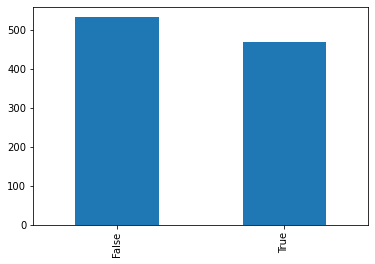

In [28]:
Tweet['comparaison_result'].value_counts().plot(kind='bar')